In [3]:
from imports import *
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format
plt.rc('figure', max_open_warning=200)
%matplotlib notebook
sns.set_theme()

In [4]:
# Path for loading EEG raw data
data_raw = mne.io.read_raw_brainvision('suj11_l2nap_day2.vhdr', preload=True)

data_raw.set_channel_types({'ROc':'eog','LOc':'eog','Aux1':'stim'})
montage = mne.channels.make_standard_montage('standard_1020')
data_raw.set_montage(montage)
picks = mne.pick_types(data_raw.info,eeg=True,meg=False,eog=True)

chan_list=data_raw.ch_names[:-2]# exclude 'AUX','STIM' channels
if 'LOc' not in chan_list:
    chan_list.append('LOc')
if 'ROc' not in chan_list:
    chan_list.append('ROc')
data_raw.pick_channels(chan_list)

data_raw.set_channel_types({'LOc':'eog','ROc':'eog'})

data_raw.pick_channels(chan_list)


Extracting parameters from suj11_l2nap_day2.vhdr...
Setting channel info structure...
Reading 0 ... 1806049  =      0.000 ...  1806.049 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<RawBrainVision | suj11_l2nap_day2.eeg, 63 x 1806050 (1806.0 s), ~868.2 MB, data loaded>

In [133]:

data_raw.set_montage('standard_1020')
print(data_raw.get_montage())

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 61 channels>


In [5]:
rois = [['Fp1','Fp2','Fpz'],['AF7, AF3','AFz'], ['F7','F5','F3','FT9','FT7','FC5','FC3'], 
           ['F1','Fz','F2','FC1','FCz','FC2'],
           ['F4','F6','F8','F10','FC4','FC6','FT8','FT10'], 
           ['T7','TP9','TP7'],
           ['T8','TP8','TP10'], 
           ['C5','C3','CP5','CP3'], 
           ['C1','Cz','C2','CP1','CPz', 'CP2'], 
           ['C4','C6','CP4','CP6'], 
           ['P9','P7','P5','P3'],
           ['P1','Pz','P2'],
           ['P4','P6','P8','P10'],
           ['PO9','PO7','PO3','O1'], 
           ['POz','Oz'],
           ['PO4','PO8','PO10','O2']]

Approximating Fpz location by mirroring Oz along the X and Y axes.


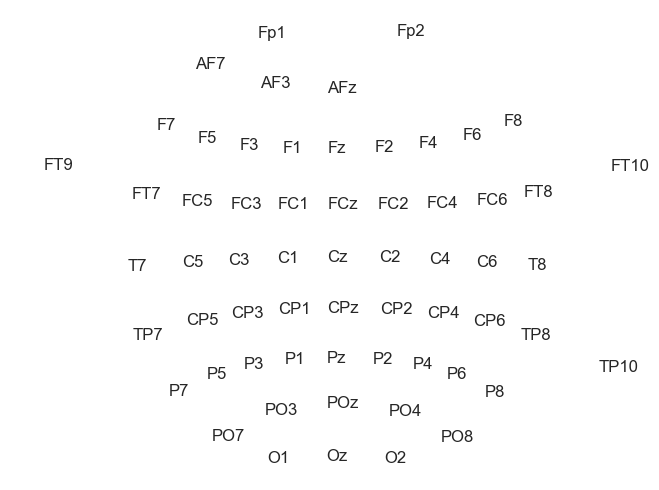

In [7]:
%matplotlib inline
fig = data_raw.plot_sensors(ch_type='eeg', show_names=True, sphere="eeglab", ch_groups=rois)

In [18]:
picks=mne.pick_types(data_raw.info,meg=False,
                     eeg=True,# select only eeg channels to filter
                     eog=False,
                     stim=False)
data_raw.filter(None,
           200,#applying a low pass filter
           l_trans_bandwidth=0.45,
           h_trans_bandwidth=50,
           picks=picks)
noise_cov=mne.compute_raw_covariance(data_raw.set_eeg_reference(),
                                     picks=picks)# compute the covariance so that we have better estimate of ICA components
data_raw.notch_filter(np.arange(60,241,60), picks=picks)# apply notch filter
reject = dict(eeg=100e-6, # reject chunk of data by defining muscle movement, but the value would change depends on different situations
              eog=120e-6)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 200.00 Hz
- Upper transition bandwidth: 50.00 Hz (-6 dB cutoff frequency: 225.00 Hz)
- Filter length: 67 samples (0.067 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using up to 9030 segments
Number of samples used : 1806000
[done]
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


In [20]:
ica = ICA(n_components=0.99,
          method='infomax',# more stable in enhancing reproducibility and stability of results compared to other methods
          max_iter='auto', # maximum iterations for ICA if not converage
          noise_cov=noise_cov, 
          random_state=97,
         )
ica.fit(data_raw,picks=picks,
        start=0,stop=data_raw.last_samp,# define start and end for ica fitting
        decim=3,# speed up computation
        reject=reject,
        tstep=2.)


Fitting ICA to data using 61 channels (please be patient, this may take a while)
    Rejecting  epoch based on EEG : ['C1']
Artifact detected in [0, 667]
    Rejecting  epoch based on EEG : ['C1']
Artifact detected in [667, 1334]
    Rejecting  epoch based on EEG : ['C1']
Artifact detected in [1334, 2001]
    Rejecting  epoch based on EEG : ['C1']
Artifact detected in [2001, 2668]
    Rejecting  epoch based on EEG : ['C1']
Artifact detected in [2668, 3335]
    Rejecting  epoch based on EEG : ['C1']
Artifact detected in [3335, 4002]
    Rejecting  epoch based on EEG : ['C1']
Artifact detected in [4002, 4669]
    Rejecting  epoch based on EEG : ['C1']
Artifact detected in [4669, 5336]
    Rejecting  epoch based on EEG : ['C1']
Artifact detected in [5336, 6003]
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'AF7', 'C1']
Artifact detected in [6003, 6670]
    Rejecting  epoch based on EEG : ['C1']
Artifact detected in [6670, 7337]
    Rejecting  epoch based on EEG : ['C1']
Artifact dete

<ICA | raw data decomposition, method: infomax (fit in 500 iterations on 548274 samples), 58 ICA components (61 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=60, n_times=1806050
    Range : 0 ... 1806049 =      0.000 ...  1806.049 secs
Ready.
Using matplotlib as 2D backend.


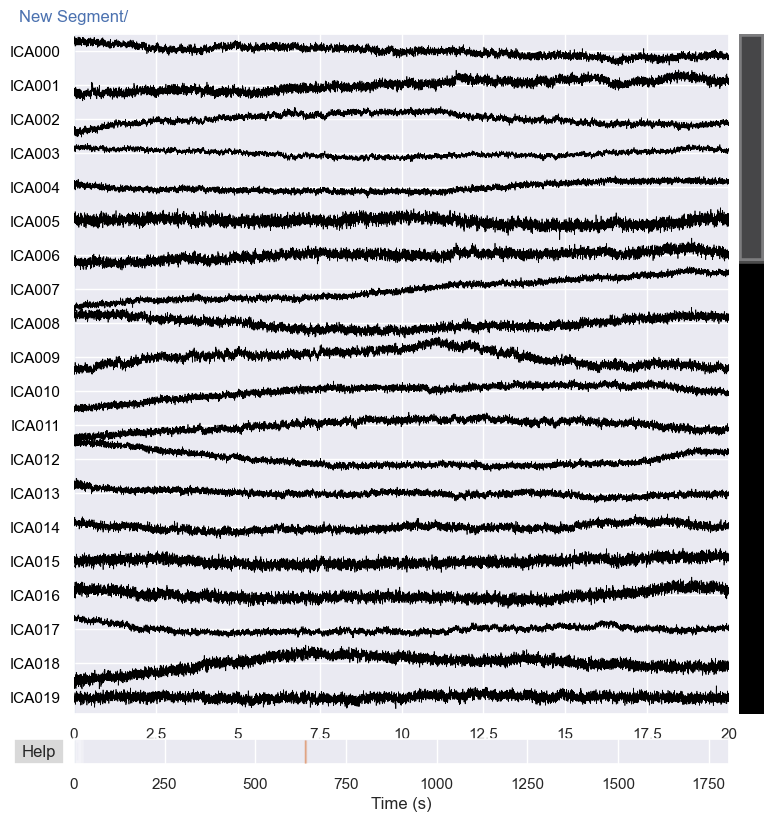

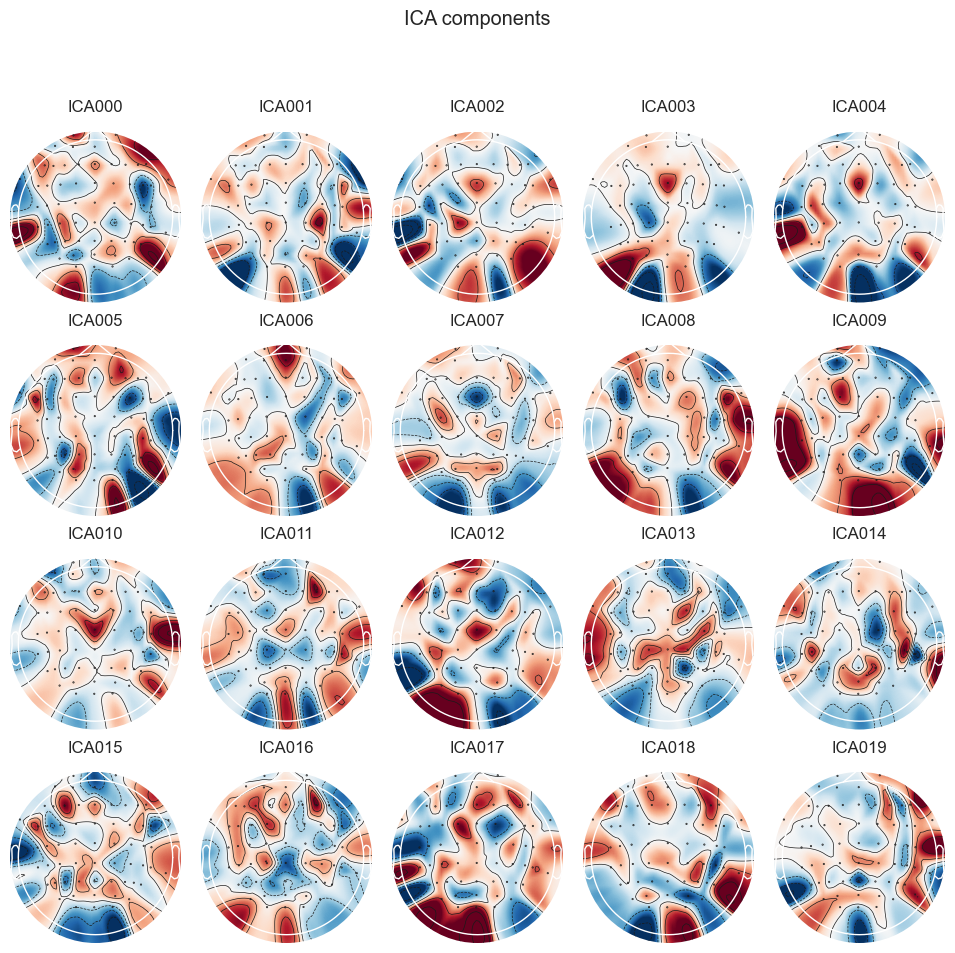

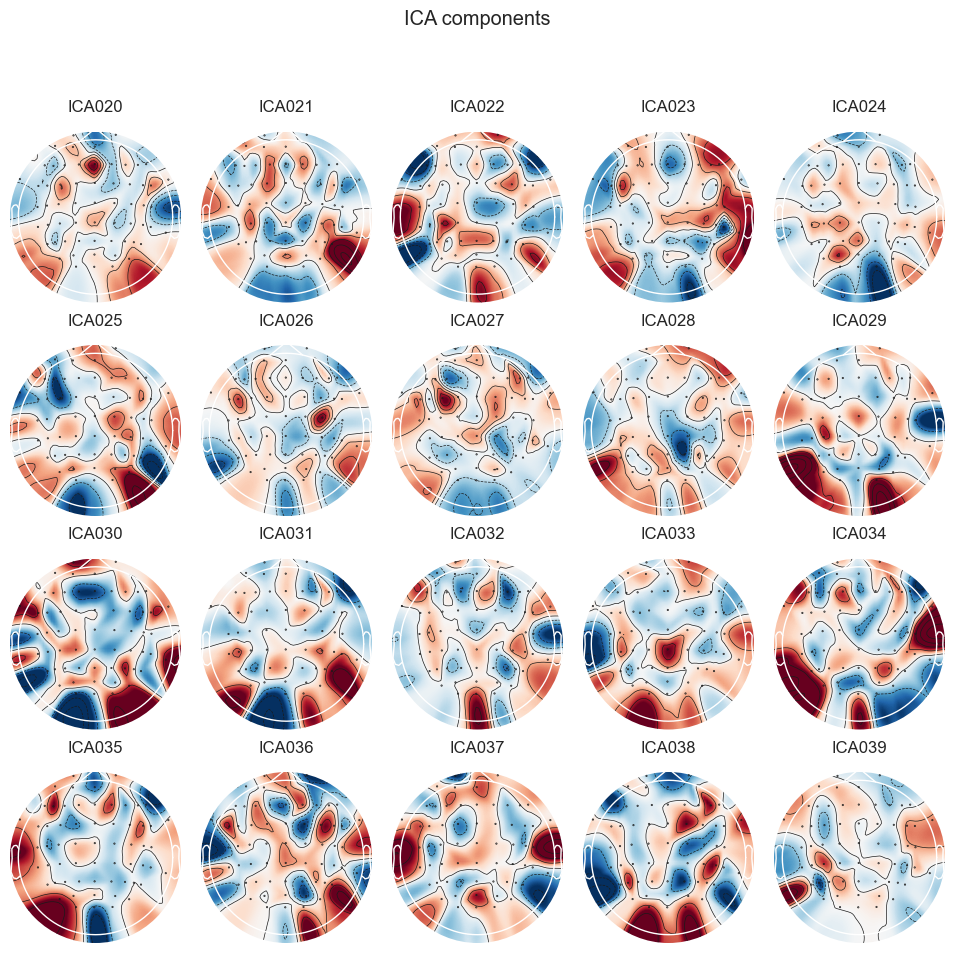

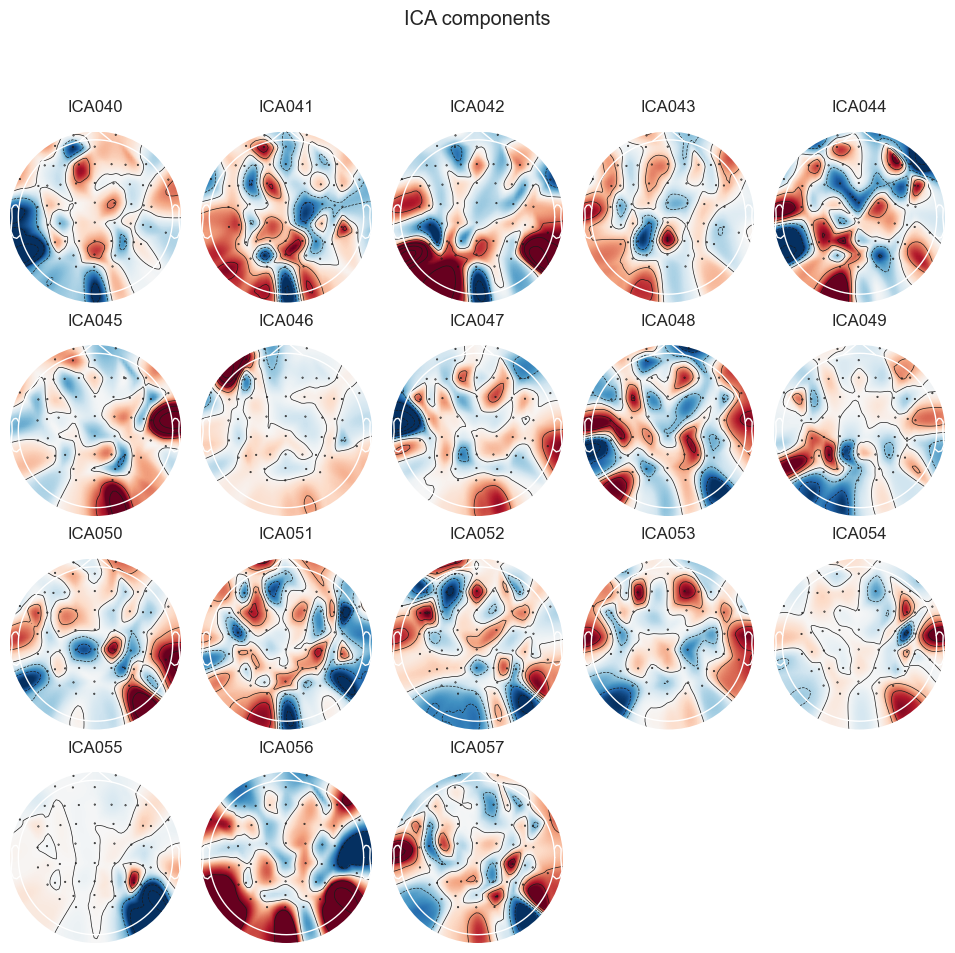

In [21]:
fig_sources = ica.plot_sources(data_raw)
fig_sources.savefig('ica_sources.png')
fig_comps = ica.plot_components()

Effective window size : 2.048 (s)


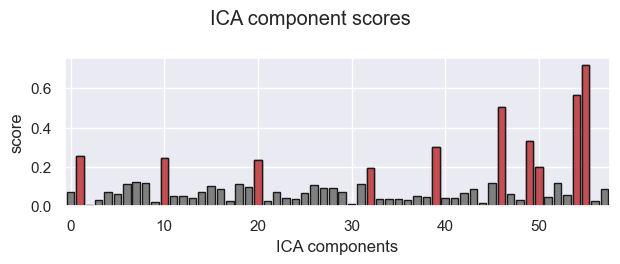

Using EOG channel: Fp1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)



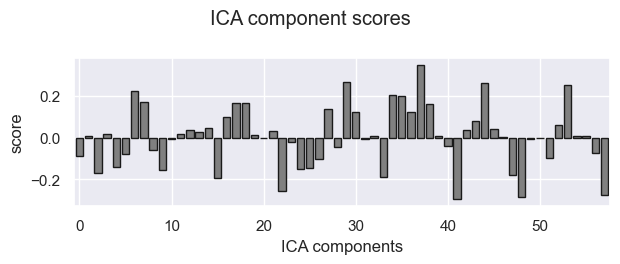

Applying ICA to Raw instance
    Transforming to ICA space (58 components)
    Zeroing out 10 ICA components
    Projecting back using 61 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (58 components)
    Zeroing out 10 ICA components
    Projecting back using 61 PCA components


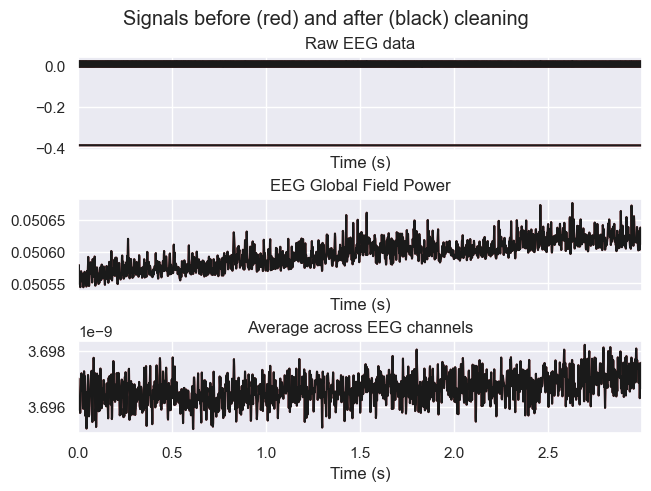


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)



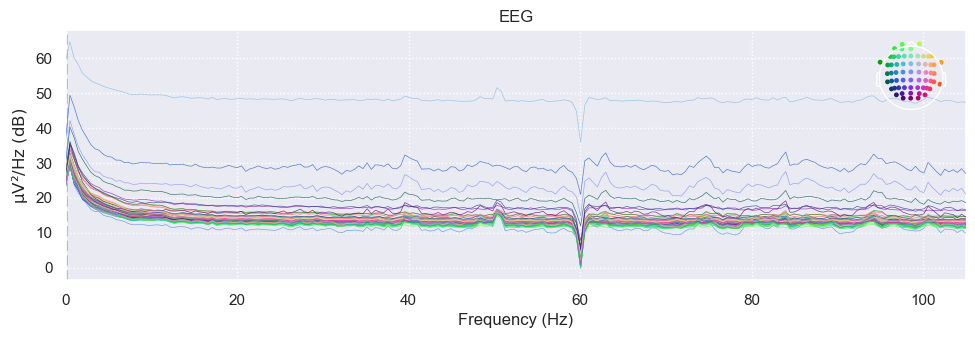

In [23]:
muscle_idx_auto, scores = ica.find_bads_muscle(data_raw)
ica.plot_scores(scores, exclude=muscle_idx_auto)
# muscle_idx_auto
eye_idx_auto, scores = ica.find_bads_eog(data_raw, ch_name='Fp1')
ica.plot_scores(scores, exclude=eye_idx_auto)
# eye_idx_auto
ica.apply(data_raw, exclude=muscle_idx_auto + eye_idx_auto)
ica.plot_overlay(data_raw, exclude=muscle_idx_auto + eye_idx_auto)
print()
data_raw.plot_psd(fmin = 0, fmax=105)
print()

In [27]:
#save

data_raw.save('reref_filterd_raw.fif')

Writing /Users/savochkin/reref_filterd_raw.fif
Closing /Users/savochkin/reref_filterd_raw.fif
[done]


In [26]:
data_raw

<RawBrainVision | suj11_l2nap_day2.eeg, 63 x 1806050 (1806.0 s), ~868.2 MB, data loaded>